# Clasificador K-NN 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
# Dataset de clientes
clientes = pd.read_csv("creditos.csv")
clientes

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


In [5]:
#Los datos de la columna "cumplio" son los que queremos predecir, por lo que los separamos en clientes buenos y malos (clase)
buenos = clientes[clientes["cumplio"]==1]
malos = clientes[clientes["cumplio"]==0]
print("Clientes buenos: ", buenos.shape[0])
print("Clientes malos: ", malos.shape[0])


Clientes buenos:  167
Clientes malos:  33


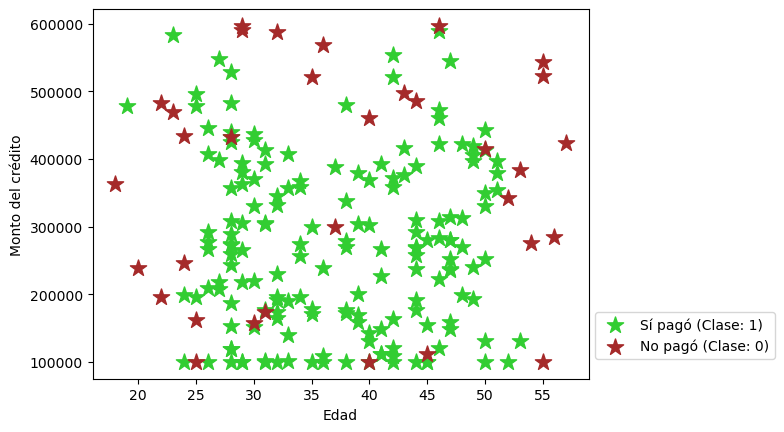

In [4]:
#Visualización de los datos
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="limegreen",
            label="Sí pagó (Clase: 1)")

plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="brown", 
            label="No pagó (Clase: 0)")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

In [6]:
#Normalización de los datos
datos = clientes[["edad", "credito"]]
clase = clientes["cumplio"]

escalador = preprocessing.MinMaxScaler()
#Se ajustan los datos en valores entre 0 y 1
datos = escalador.fit_transform(datos)
print(datos)

[[0.         0.52964444]
 [0.02564103 0.76084353]
 [0.05128205 0.27995193]
 [0.1025641  0.19176844]
 [0.1025641  0.76931624]
 [0.12820513 0.74242458]
 [0.12820513 0.97341632]
 [0.15384615 0.        ]
 [0.15384615 0.19983453]
 [0.15384615 0.29429053]
 [0.15384615 0.67122276]
 [0.17948718 0.        ]
 [0.17948718 0.12374716]
 [0.17948718 0.19192143]
 [0.17948718 0.76130249]
 [0.17948718 0.79673129]
 [0.20512821 0.        ]
 [0.20512821 0.21862589]
 [0.20512821 0.33577846]
 [0.20512821 0.35571521]
 [0.20512821 0.38628463]
 [0.20512821 0.61926119]
 [0.20512821 0.69480706]
 [0.23076923 0.21664509]
 [0.23076923 0.23805134]
 [0.23076923 0.60140789]
 [0.23076923 0.90058196]
 [0.25641026 0.        ]
 [0.25641026 0.03816245]
 [0.25641026 0.03904616]
 [0.25641026 0.10798336]
 [0.25641026 0.17607107]
 [0.25641026 0.28867627]
 [0.25641026 0.32202564]
 [0.25641026 0.3484986 ]
 [0.25641026 0.35193882]
 [0.25641026 0.38080524]
 [0.25641026 0.42070089]
 [0.25641026 0.51803547]
 [0.25641026 0.65311582]


In [14]:
# Se crea el clasidicador KNN con 5 vecinos
clasificador = KNeighborsClassifier(n_neighbors=5)

clasificador.fit(datos, clase)

14


KNeighborsClassifier()

Clase: [0]
Probabilidades por clase [[0.6 0.4]]


c:\Users\angel\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


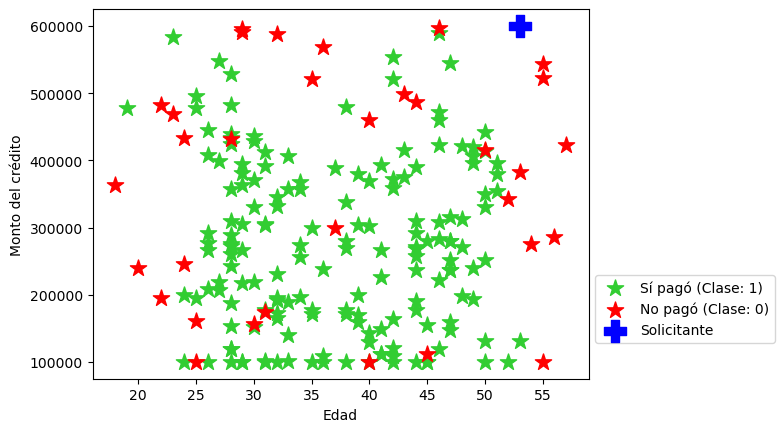

In [18]:
edad = 53
monto = 600000

#Escalar los datos del nuevo solicitante
solicitante = escalador.transform([[edad, monto]])

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(solicitante))
print("Probabilidades por clase",
      clasificador.predict_proba(solicitante))

#Código para graficar
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="limegreen", label="Sí pagó (Clase: 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red", label="No pagó (Clase: 0)")
plt.scatter(edad, monto, marker="P", s=250, color="blue", label="Solicitante") 
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()